# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# The dataset

## File descriptions

* train.csv - the training dataset
* test.csv - the test dataset
* data_description.txt - full description of each column

## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value (in dollars) of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

# -------------------- NOTEBOOK --------------------

# 1. Descriptive statistics about the data

## 1.1. First dive into the dataset : Exploratory Data Analysis

In [1]:
!pip install seaborn
!pip install xgboost
!pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import xgboost as xgb
import statsmodels.formula.api as sm
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, Imputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFromModel


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
base = "challenge_data/"

In [4]:
train_data = pd.read_csv(base + "train.csv", index_col='Id')
test_data = pd.read_csv(base + "test.csv", index_col='Id')

In [5]:
train_test_df = pd.concat((train_data, test_data), axis=0)
print('Shape of the combined dataset: {}'.format(train_test_df.shape))

Shape of the combined dataset: (1460, 80)


### Training Dataset

In [6]:
print('Shape of the train_data dataset: {}'.format(train_data.shape))
print('Information about the train_data dataset: \n')
pd.set_option('display.max_columns', None)
train_data.describe(include='all')

Shape of the train_data dataset: (1200, 80)
Information about the train_data dataset: 



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1200.000000,1200,990.000000,1200.000000,1200,75,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200.000000,1200.000000,1200.000000,1200.000000,1200,1200,1200,1200,1194,1194.000000,1200,1200,1200,1168,1168,1167,1168,1200.000000,1167,1200.000000,1200.000000,1200.000000,1200,1200,1200,1200,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200,1200.000000,1200,1200.000000,636,1133,1133.000000,1133,1200.000000,1200.000000,1133,1133,1200,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,4,227,47,1200.000000,1200.000000,1200.000000,1200,1200,1200.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,7,5,8,NaN,NaN,NaN,NaN,5,6,14,15,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,4,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,3,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,946,NaN,NaN,1194,41,754,1079,1199,862,1135,179,1035,1186,1001,601,NaN,NaN,NaN,NaN,945,1178,417,410,711,NaN,747,1050,534,526,1076,784,346,NaN,1034,NaN,NaN,NaN,1177,603,1122,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602,NaN,1117,NaN,309,718,NaN,500,NaN,NaN,1081,1093,1107,NaN,NaN,NaN,NaN,NaN,NaN,2,130,44,NaN,NaN,NaN,1036,979,NaN
mean,57.075000,NaN,70.086869,10559.411667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.105000,5.568333,1971.350833,1984.987500,NaN,NaN,NaN,NaN,NaN,103.962312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444.886667,NaN,45.260000,564.553333,1054.700000,NaN,NaN,NaN,NaN,1157.430833,344.993333,6.553333,1508.97750,0.421667,0.061667,1.560833,0.382500,2.857500,1.045000,NaN,6.494167,NaN,0.614167,NaN,NaN,1978.368932,NaN,1.763333,472.604167,NaN,NaN,NaN,95.136667,46.016667,22.178333,3.653333,14.980833,1.909167,NaN,NaN,NaN,40.453333,6.311667,2007.810833,NaN,NaN,181414.628333
std,42.682012,NaN,23.702029,10619.135549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383439,1.120138,30.048408,20.527221,NaN,NaN,NaN,NaN,NaN,183.534953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.987844,NaN,158.931453,440.388327,419.996306,NaN,NaN,NaN,NaN,375.238607,437.038023,52.077992,517.38033,0.520342,0.247484,0.552165,0.499735,0.819199,0.219123,NaN,1.614664,NaN,0.642113,NaN,NaN,24.812865,NaN,0.743494,212.722444,NaN,NaN,NaN,124.034129,65.677629,61.507323,29.991099,54.768057,33.148327,NaN,NaN,NaN,482.323444,2.673104,1.319027,NaN,NaN,81070.908544
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1875.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000

According to the describe method, we have two types of data : qualitative (columns have no mean/std/min/quartile) and quantitative. 
Every single column has a vastly different mean, min, max and standard deviation which mean we will need to normalize our dataset.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1 to 1200
Data columns (total 80 columns):
MSSubClass       1200 non-null int64
MSZoning         1200 non-null object
LotFrontage      990 non-null float64
LotArea          1200 non-null int64
Street           1200 non-null object
Alley            75 non-null object
LotShape         1200 non-null object
LandContour      1200 non-null object
Utilities        1200 non-null object
LotConfig        1200 non-null object
LandSlope        1200 non-null object
Neighborhood     1200 non-null object
Condition1       1200 non-null object
Condition2       1200 non-null object
BldgType         1200 non-null object
HouseStyle       1200 non-null object
OverallQual      1200 non-null int64
OverallCond      1200 non-null int64
YearBuilt        1200 non-null int64
YearRemodAdd     1200 non-null int64
RoofStyle        1200 non-null object
RoofMatl         1200 non-null object
Exterior1st      1200 non-null object
Exterior2nd      1200 non-n

print('DataType of MSSubClass feature BEFORE transformation: {}'.format(train_data['MSSubClass'].dtype))
train_data['MSSubClass'] = train_data['MSSubClass'].astype('object') # conversion as object type
print('DataType of MSSubClass feature AFTER transformation: {}'.format(train_data['MSSubClass'].dtype))

### Testing dataset

In [8]:
print(test_data.shape)
train_data.head(5)

(260, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Remarks
- **`train_data`** dataset is composed of 80 features (including the **`SalePrice`** feature)
- **`test_data`** dataset is composed of 79 features (without the **`SalePrice`** feature, that we'll predict)

As you can already infer from the data, the dataset is composed of numerical features and categorical features.  
There are also missing values that we will need to transform.  

We're going to tackle this 2 first observations with section 1.3. and ... but first, let's take a look at the labels of this challenge. 

## 1.2.  `SalePrice` insight : #labels 

An unique section dedicated to analyse the labels of our dataset.  

In [9]:
train_data['SalePrice'].describe()

count      1200.000000
mean     181414.628333
std       81070.908544
min       34900.000000
25%      129900.000000
50%      163700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Information about the SalePrice feature: 
         	 - mu = 181414.63 
         	 - sigma = 81070.91 
         	 - Skewness 1.9672153474609588  
         	 - Kurtosis 7.033906965957225
Information about the log(SalePrice) feature: 
         	 - mu = 12.02 
         	 - sigma = 0.40 
         	 - Skewness 0.1327137746797166  
         	 - Kurtosis 0.8888499967600696


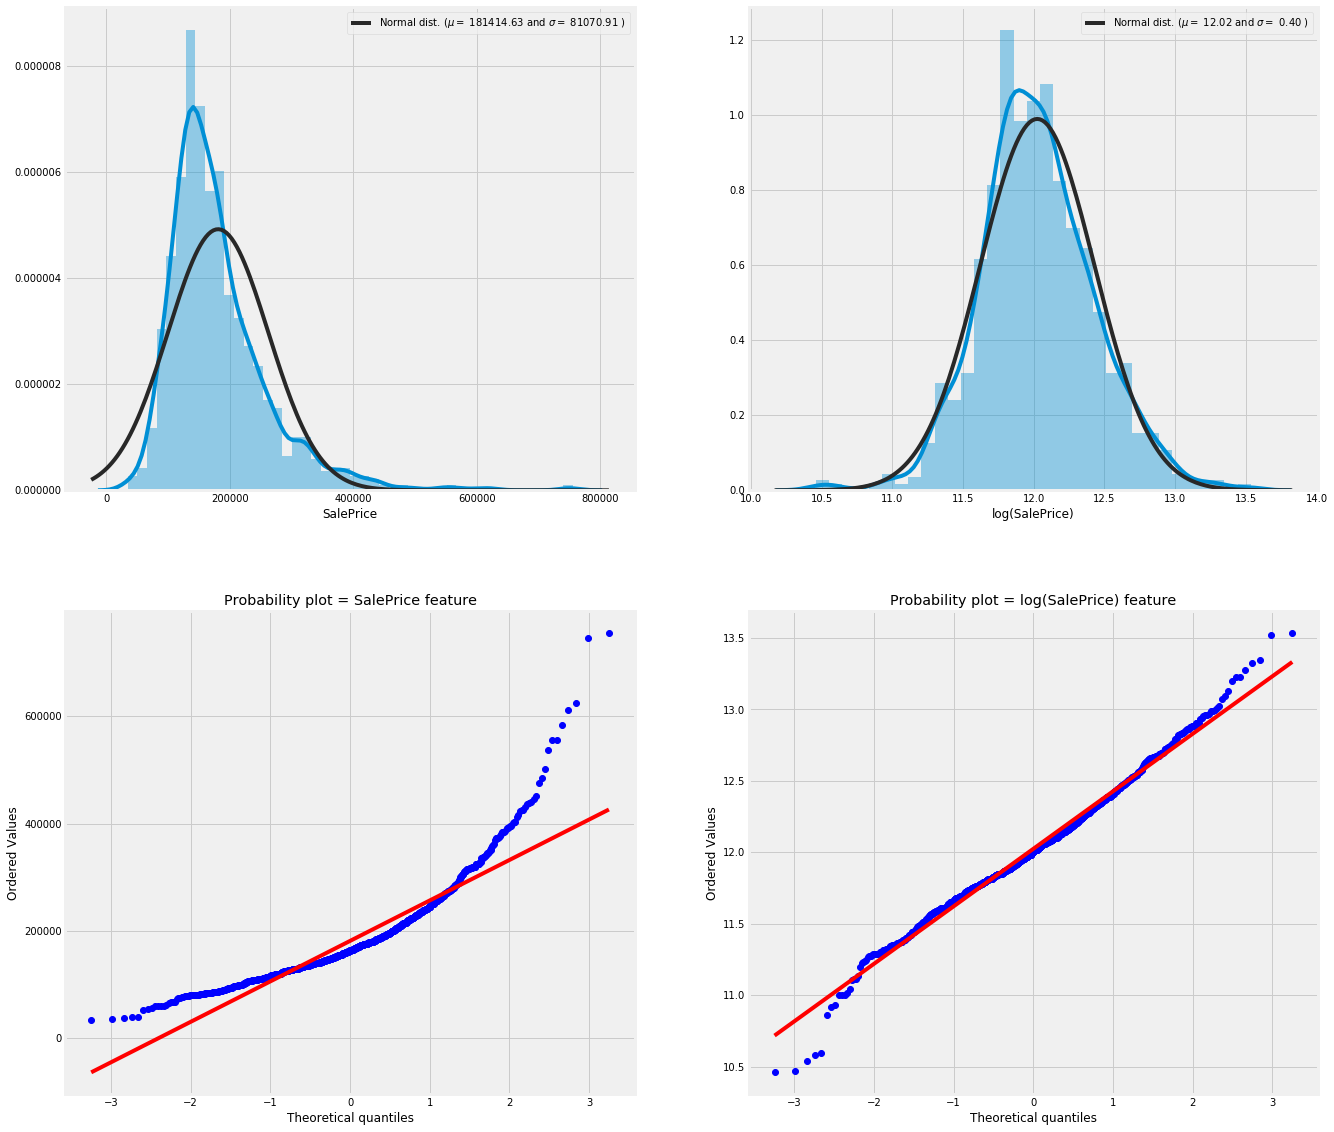

In [10]:
sale_price = train_data['SalePrice']
mu = sale_price.mean()
mu_log = np.log(sale_price).mean()
sigma = sale_price.std()
sigma_log = np.log(sale_price).std()
print('Information about the SalePrice feature: \n \
        \t - mu = {:.2f} \n \
        \t - sigma = {:.2f} \n \
        \t - Skewness {}  \n \
        \t - Kurtosis {}'.format(mu, \
                                 sigma, \
                                 sale_price.skew(), \
                                 sale_price.kurt()))

print('Information about the log(SalePrice) feature: \n \
        \t - mu = {:.2f} \n \
        \t - sigma = {:.2f} \n \
        \t - Skewness {}  \n \
        \t - Kurtosis {}'.format(mu_log, \
                                 sigma_log, \
                                 np.log(sale_price).skew(), \
                                 np.log(sale_price).kurt()))

plt.figure(figsize=[20,20])
plt.subplot(221)
sns.distplot(sale_price, fit=norm, kde=True)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.xlabel('SalePrice')

plt.subplot(222)
sns.distplot(np.log(sale_price), fit=norm, kde=True)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu_log, sigma_log)],
           loc='best')
plt.xlabel('log(SalePrice)')

plt.subplots_adjust(hspace=.25)

plt.subplot(223)
stats.probplot(sale_price, plot=plt)
plt.title('Probability plot = SalePrice feature')

plt.subplot(224)
stats.probplot(np.log(sale_price), plot=plt)
plt.title('Probability plot = log(SalePrice) feature')
plt.show()

Notice that the distribution has a longer tail on the right. The distribution is positively skewed.
After the application of log transformation, we can see visually that the data will more resembles a normal distribution.

Later, we need to fix our data to be "normal" as possible. As we can see here, there is a very nice peak and the sale prices deviate from the normal distribution. 

## 1.3. Numerical features Vs Categorical features

From the observation of the **`train_data.describe()`**, we can observe that the **`train_data`** dataset contains different datatypes.  
Let's examine this deeper!

In [11]:
train_data.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [12]:
numerical_train_data_df = train_data.select_dtypes(include=[np.number])
categorical_train_data_df = train_data.select_dtypes(exclude=[np.number])
print('Shape of numerical_train_data_df: {}'.format(numerical_train_data_df.shape))
print('Shape of categorical_train_data_df: {}'.format(categorical_train_data_df.shape))

Shape of numerical_train_data_df: (1200, 37)
Shape of categorical_train_data_df: (1200, 43)


### 1.2.1. Statistical exploration of numerical features and transformation into categorical features

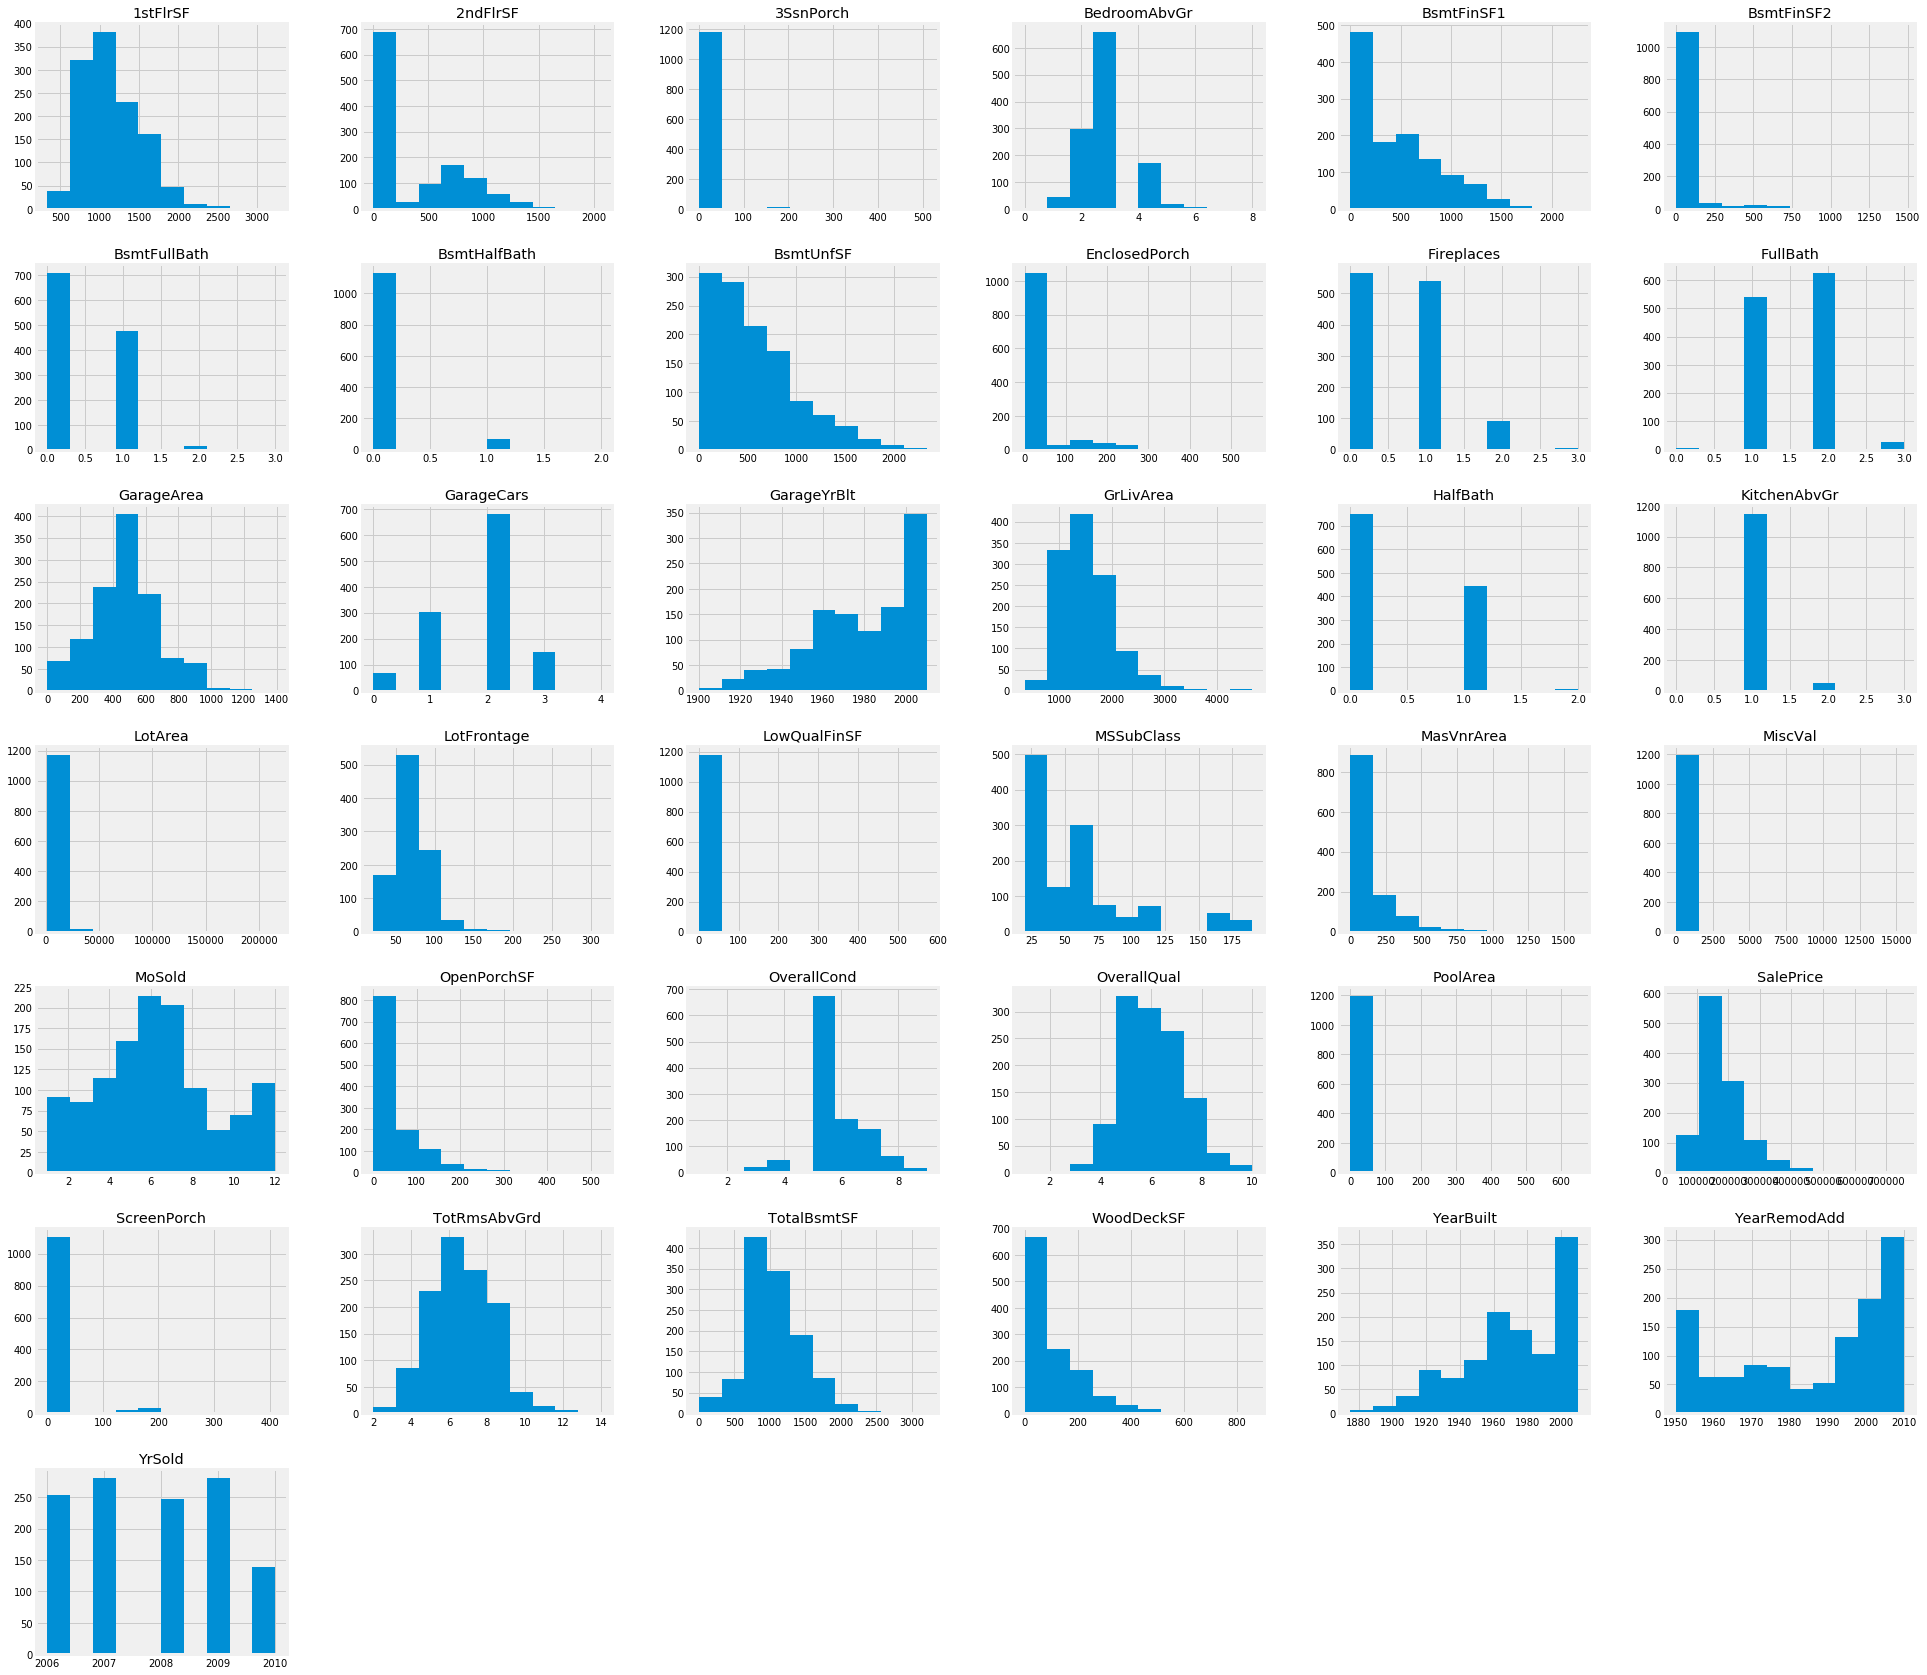

In [13]:
plt.subplots(figsize=(30,30))
ax = plt.subplot()
train_data.select_dtypes(include=[np.number]).hist(ax=ax)
plt.show()

**Remarks**  
We can see that some features respect a normal distribution, so, at this stage, we can consider them the most important ones.  
However, for the others graphs, we need to go into details to analyse the data. 

### Correlation matrix
Let's highlight the most important features versus the `SalePrice` label. 

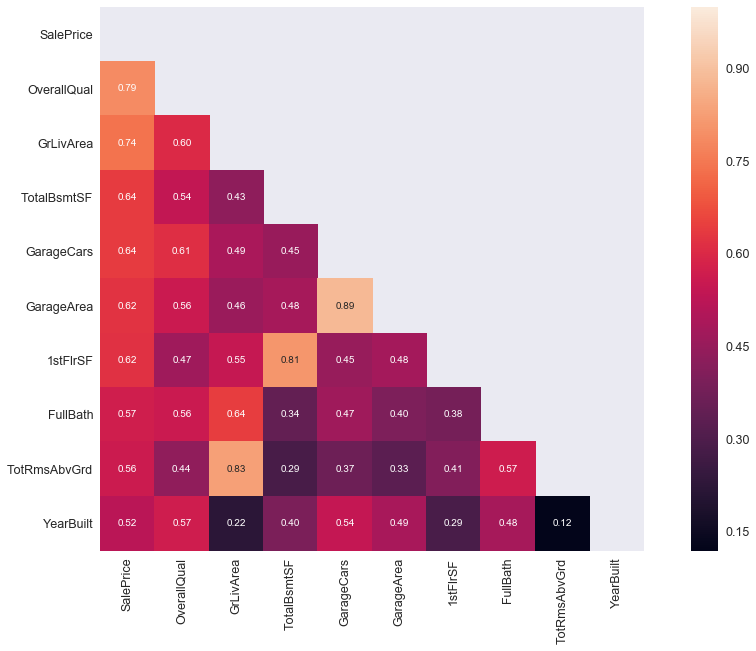

In [14]:
corr_matrix = train_data.corr()
plt.figure(figsize=(15,10))
k = 10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.25)
sns.heatmap(cm, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, \
           yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our heatmap above, these are the features most correlated between each other.  
Here are some oservations we can infer from the heatmap.
- **`OverallQual`**, **`GrLivArea`**, **`TotalBsmtSF`**, **`GarageCars`**, **`GarageArea`** are strongly correlated to the **`SalePrice`** feature. 
- **`GarageCars`** and **`GarageAreas`** are the most strongly correlated features.

In [15]:
#top10_num_features = pd.DataFrame(cols)
most_correlated_features = pd.DataFrame(cols)
most_correlated_features.columns = ['Most Positive Correlated Numerical Features']
most_correlated_features

,Most Positive Correlated Numerical Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,TotalBsmtSF
4,GarageCars
5,GarageArea
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


Next five are the most negatively correlated.

In [16]:
corr = numerical_train_data_df.corr()
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

YrSold          -0.039841
MSSubClass      -0.075817
OverallCond     -0.082580
EnclosedPorch   -0.119790
KitchenAbvGr    -0.133544
Name: SalePrice, dtype: float64


**Analysis of the most correlated features**

In [17]:
train_data['OverallQual'].describe()

count    1200.000000
mean        6.105000
std         1.383439
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [18]:
train_data.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

The OverallQual data are integer values in the interval 1 to 10 inclusive.

In [19]:
quality_pivot = train_data.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)

In [20]:
quality_pivot

,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,89250.0
4,108000.0
5,132000.0
6,159750.0
7,200120.5
8,267500.0
9,345000.0


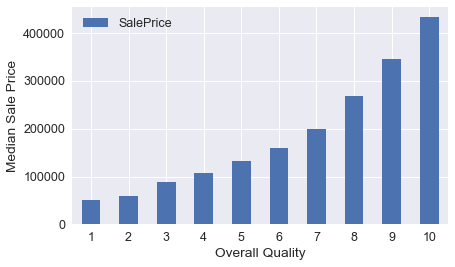

In [21]:
quality_pivot.plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

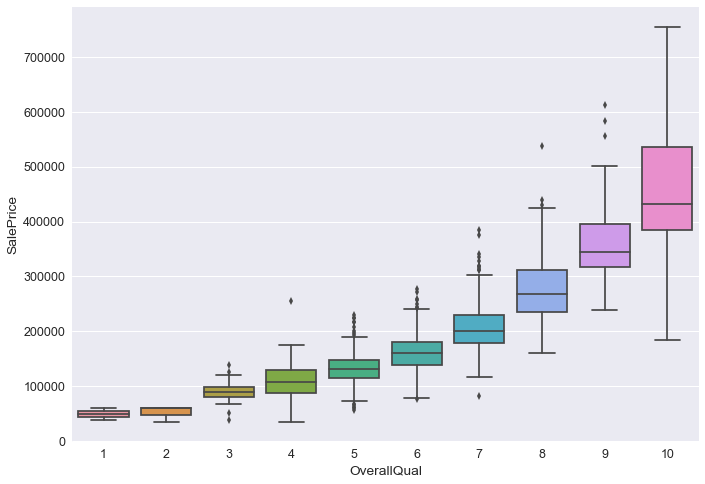

In [22]:
plt.subplots(figsize=(10, 8))
ax = plt.subplot()
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data=train_data)

The `OverallQual` feature should be composed of the following values: 
OverallQual: Rates the overall material and finish of the house

       10   Very Excellent
       9    Excellent
       8    Very Good
       7    Good
       6    Above Average
       5    Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
A mean value equals to $6,105$ doesn't see to have a numerical interpretation, hence, `OverallQual` will be treated as a categorical feature. 


train_data['OverallQual'] = train_data['OverallQual'].astype('object') # conversion as object type
train_data['OverallCond'] = train_data['OverallCond'].astype('object')

In [23]:
train_data.GrLivArea.describe()

count    1200.00000
mean     1508.97750
std       517.38033
min       334.00000
25%      1125.75000
50%      1456.00000
75%      1764.50000
max      4676.00000
Name: GrLivArea, dtype: float64

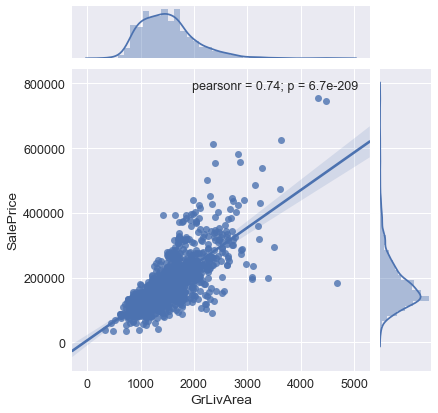

In [24]:
# GrLivArea vs Sale Price
sns.jointplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], kind='reg')

An outlier at the bottom right should be removed. This will be treated in the corresponding section. 

In [25]:
train_data.TotalBsmtSF.describe()

count    1200.000000
mean     1054.700000
std       419.996306
min         0.000000
25%       796.000000
50%      1002.500000
75%      1298.250000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

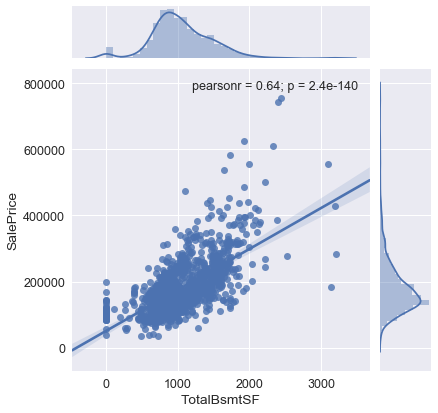

In [26]:
# TotalBsmtSF vs Sale Price
sns.jointplot(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'], kind='reg')

count    1200.000000
mean        1.763333
std         0.743494
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


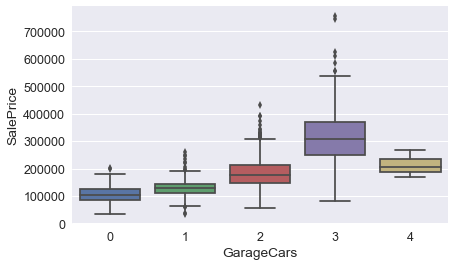

In [27]:
print(train_data.GarageCars.describe())
# GarageCars vs Sale Price
sns.boxplot(x=train_data['GarageCars'], y=train_data['SalePrice'])

In [28]:
train_data.PoolArea.describe()

count    1200.000000
mean        1.909167
std        33.148327
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       648.000000
Name: PoolArea, dtype: float64

There is something strange about the `GarageCars` feature with $value = 4$. It's not following the same trend. We keep this in mind whether we need to transform this feature into categorical feature later on. 

count    1200.000000
mean      472.604167
std       212.722444
min         0.000000
25%       334.500000
50%       478.000000
75%       576.000000
max      1390.000000
Name: GarageArea, dtype: float64


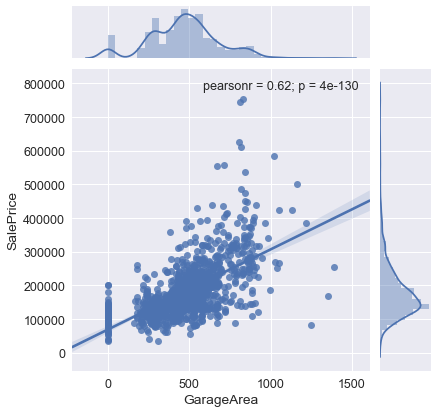

In [29]:
print(train_data.GarageArea.describe())
sns.jointplot(x = train_data.GarageArea, y = train_data['SalePrice'], kind='reg')

Notice that there are many homes with 0 for Garage Area, indicating that they don't have a garage

count    1200.000000
mean     1157.430833
std       375.238607
min       334.000000
25%       882.000000
50%      1087.000000
75%      1390.250000
max      3228.000000
Name: 1stFlrSF, dtype: float64


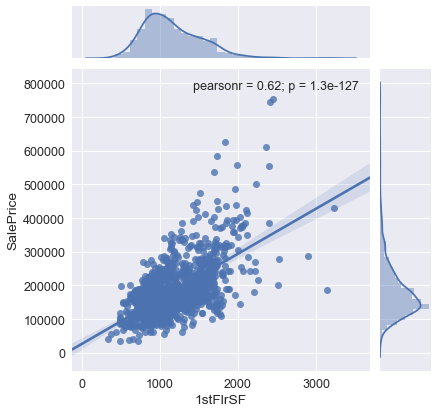

In [30]:
print(train_data['1stFlrSF'].describe())
#1stFlrSF : First Floor square feet
sns.jointplot(x=train_data['1stFlrSF'], y=train_data['SalePrice'], kind='reg')

we could be tempted to delete the 2 above points, but nah. 

count    1200.000000
mean        1.560833
std         0.552165
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


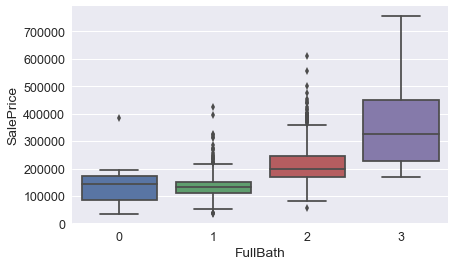

In [31]:
print(train_data.FullBath.describe())
#FullBath : Full bathrooms above grade
sns.boxplot(x=train_data['FullBath'], y=train_data['SalePrice'])

nothing to change

count    1200.000000
mean     1971.350833
std        30.048408
min      1875.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


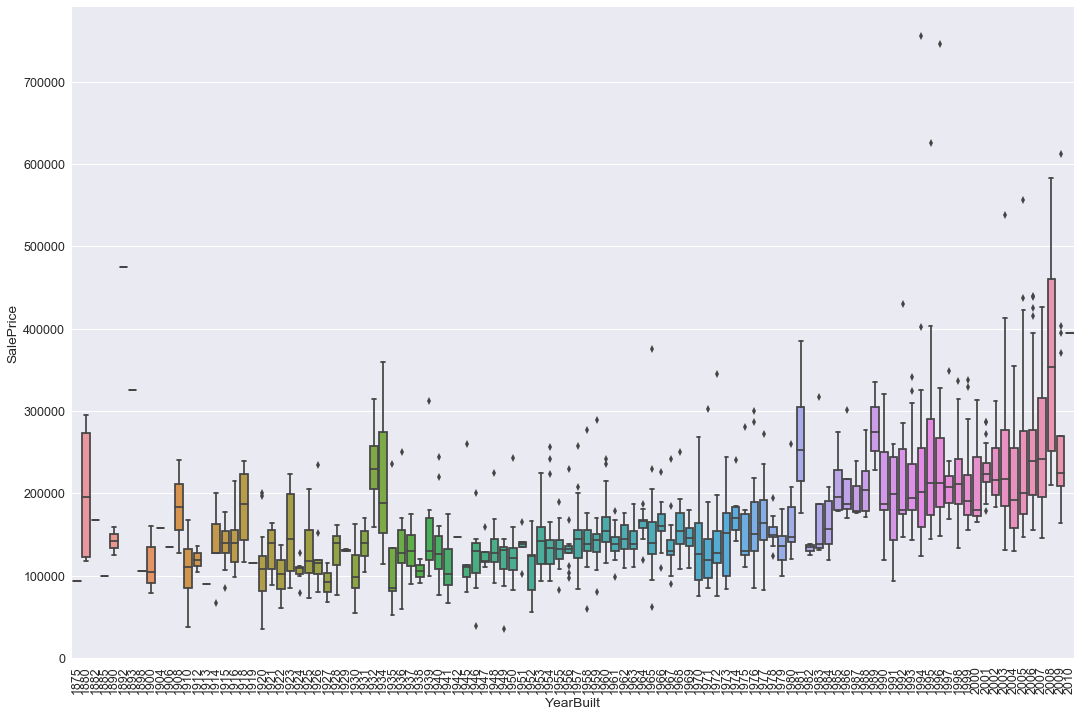

In [32]:
print(train_data.YearBuilt.describe())
plt.subplots(figsize=(16, 12))
ax = plt.subplot()
sns.boxplot(x = train_data.YearBuilt, y = train_data.SalePrice)
plt.xticks(rotation=90);
#train_data.YearBuilt - mean / std 
# train_data.YearBuilt.astype['object'] ? ou scaling ? 

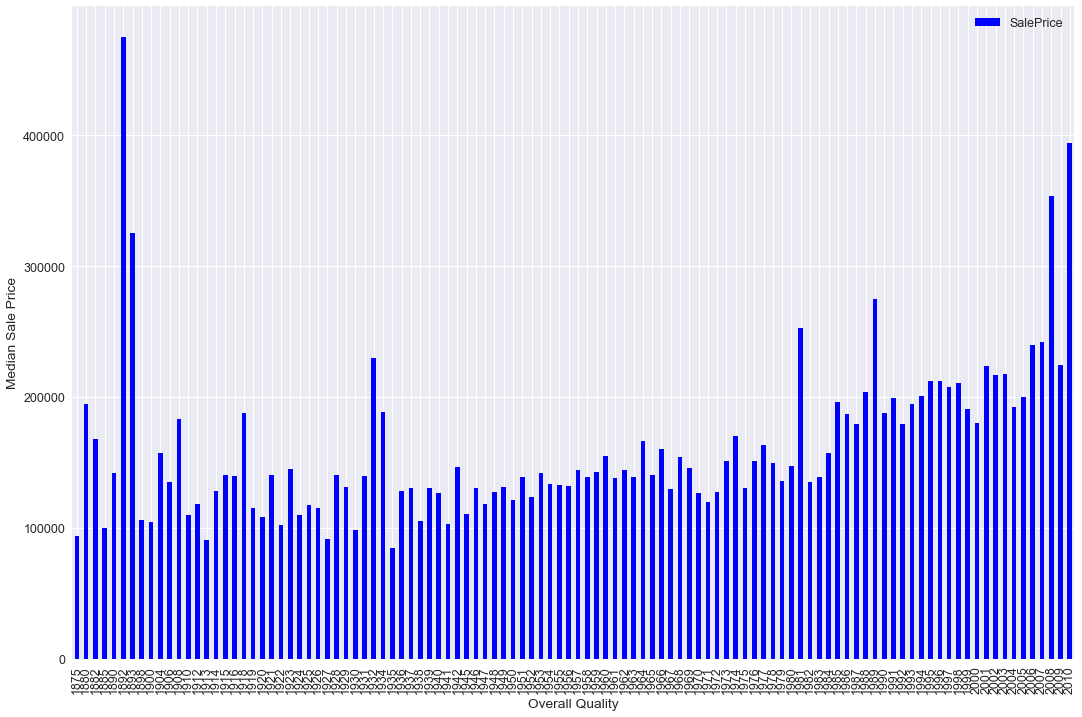

In [33]:
quality_pivot = train_data.pivot_table(index='YearBuilt', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue', figsize=(16, 12))
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.show()

### 1.2.2. Visualization of categorical features

In [34]:
categorical_train_data_df.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1200,1200,75,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1194,1200,1200,1200,1168,1168,1167,1168,1167,1200,1200,1200,1200,1200,1200,636,1133,1133,1133,1133,1200,4,227,47,1200,1200
unique,5,2,2,4,4,2,5,3,25,9,7,5,8,5,6,14,15,4,4,5,6,4,4,4,6,6,4,5,2,5,4,7,5,6,3,5,5,3,3,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,946,1194,41,754,1079,1199,862,1135,179,1035,1186,1001,601,945,1178,417,410,711,747,1050,534,526,1076,784,346,1034,1177,603,1122,1095,602,1117,309,718,500,1081,1093,1107,2,130,44,1036,979


In [35]:
categorical_train_data_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Let's analyse some randomly chosen categorical features and observe their distribution:
- MSZoning
- Neighborhood
- LotConfig
- Street
- SaleCondition
- Saletype
- OverallQual
- ...

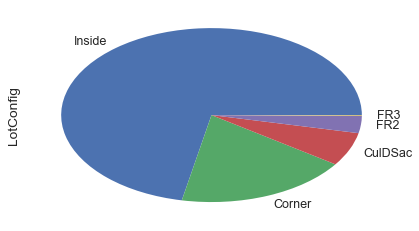

In [36]:
train_data.LotConfig.value_counts().plot(kind='pie')

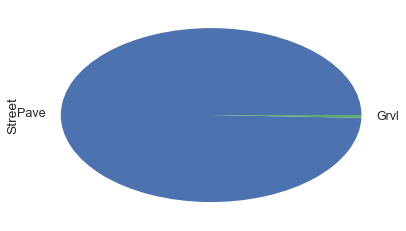

In [37]:
train_data.Street.value_counts().plot(kind='pie')

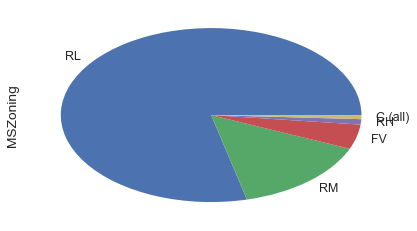

In [38]:
train_data['MSZoning'].value_counts().plot(kind='pie')

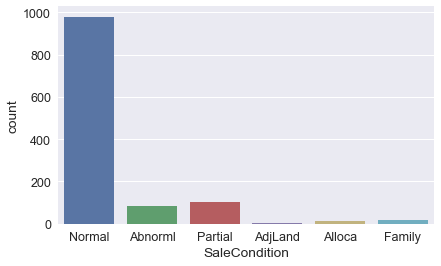

In [39]:
# Show value counts for a single categorical variable:
ax = sns.countplot(x="SaleCondition", data=train_data)

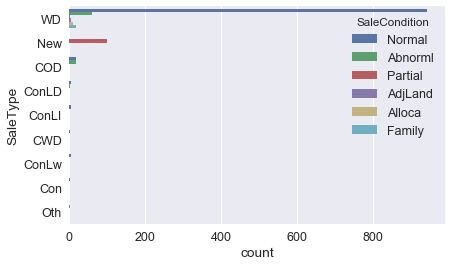

In [40]:
#Show value counts for two categorical variables:
sns.countplot(y="SaleType", hue="SaleCondition", data=train_data)

Let's analyse the previous features compared to the `SalePrice` feature. 

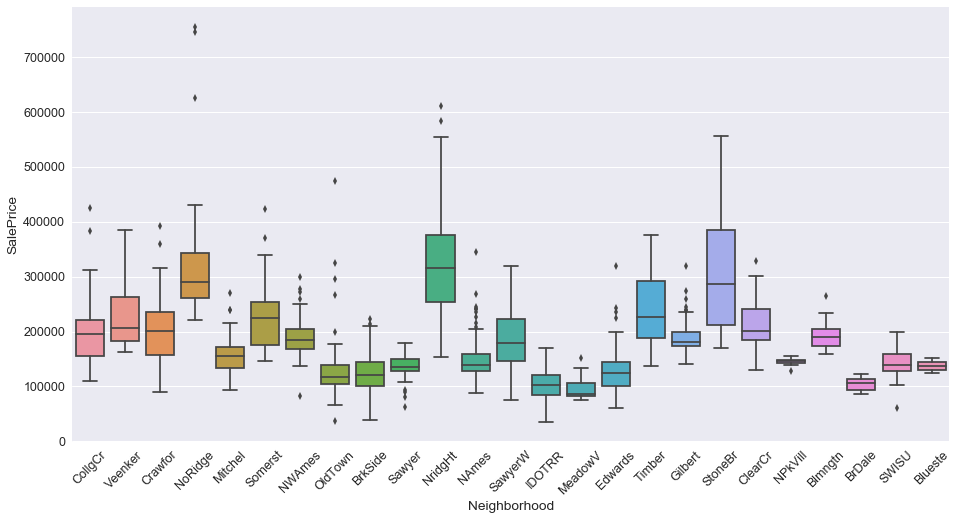

In [41]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = train_data)
xt = plt.xticks(rotation=45)

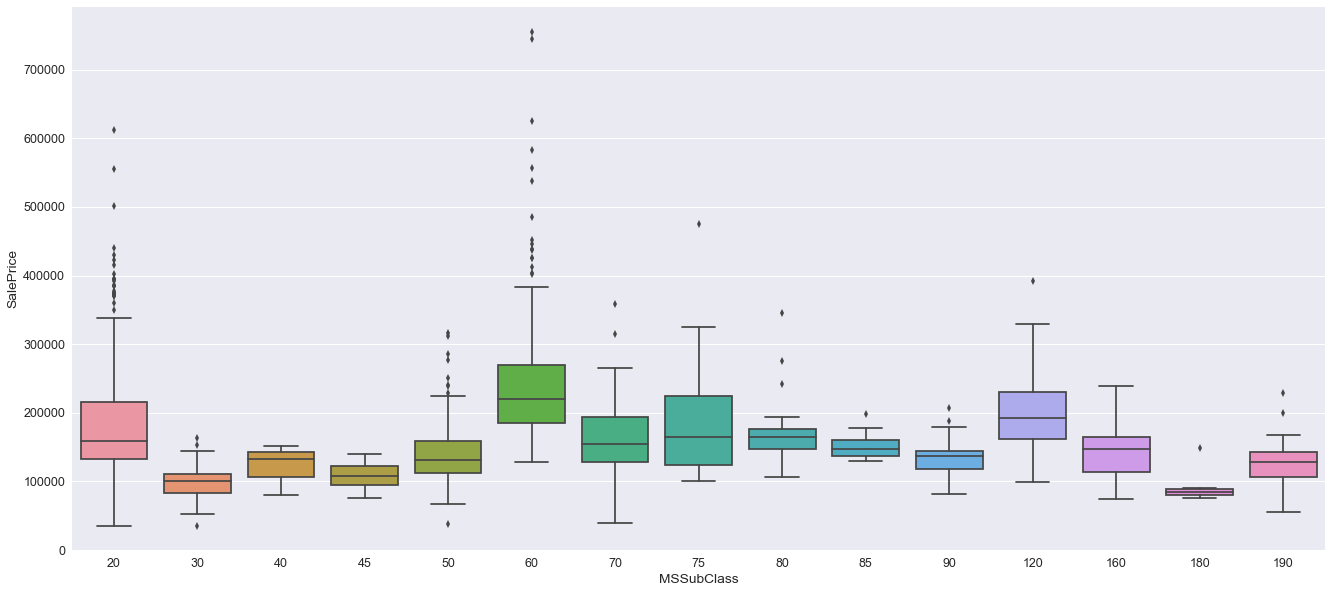

In [42]:
plt.subplots(figsize=(20,10))
ax=plt.subplot()
sns.boxplot(x='MSSubClass', y='SalePrice', data=train_data)
plt.show()

# 2. Data cleaning and pre-processing

## 2.1. Pre-processing phase

### Handling of outliers

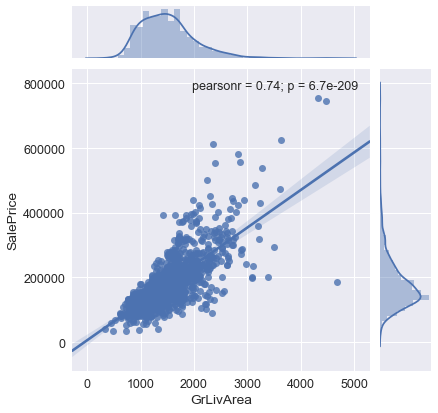

In [43]:
# GrLivArea vs Sale Price
sns.jointplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], kind='reg')

In [44]:
# Removing outlier manually (One point in the bottom right)
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000)
                        & (train_data['SalePrice']<200000)].index).reset_index(drop=True)

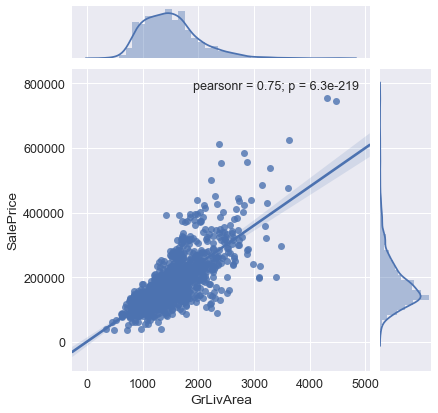

In [45]:
# GrLivArea vs Sale Price
sns.jointplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], kind='reg')

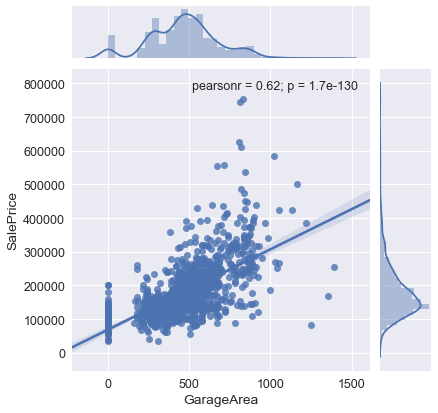

In [46]:
sns.jointplot(x = train_data.GarageArea, y = train_data['SalePrice'], kind='reg')

In [47]:
train_data = train_data.drop(train_data[(train_data['GarageArea']>1000)
                        & (train_data['SalePrice']<300000)].index).reset_index(drop=True)

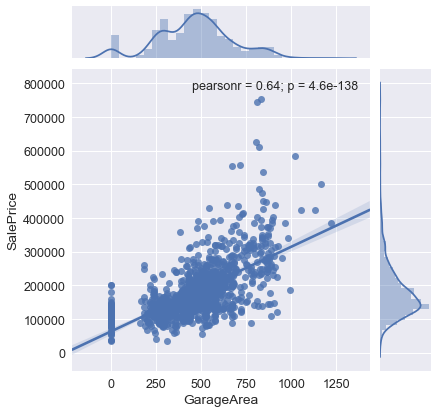

In [48]:
sns.jointplot(x = train_data.GarageArea, y = train_data['SalePrice'], kind='reg')

### Handling missing values

Handling of missing values
1. Numerical features
2. Categorical features

In [49]:
# Find Missing Ratio of Dataset
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
PoolQC,99.664711
MiscFeature,96.144174
Alley,93.713328
Fence,80.972339
FireplaceQu,47.191953
LotFrontage,17.518860
GarageYrBlt,5.616094
GarageType,5.616094
GarageFinish,5.616094
GarageQual,5.616094


Text(0.5,1,'Percent missing data by feature')

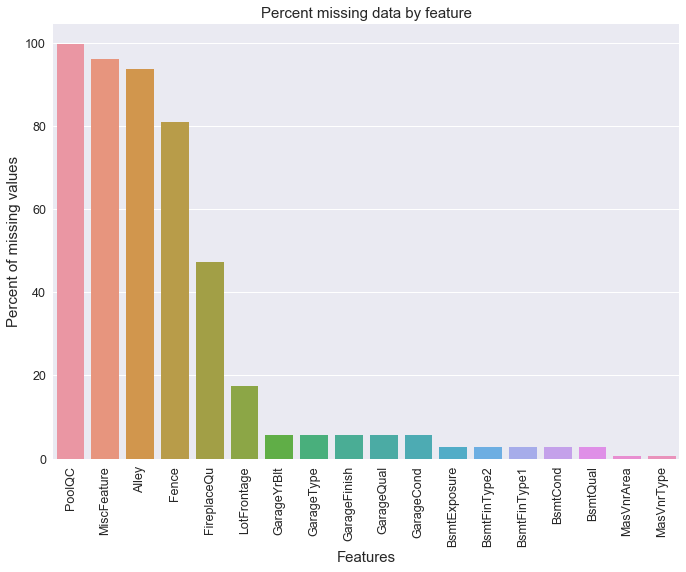

In [50]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_data_na.index, y=train_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

**Categorical features**

Let's take an example, in the `PoolQC` feature, `NA` value means `NoPool`. Hence, we change the `NA` value with `NoPool`.  
The same procedure will be applied for the categorical features that have missing values. 

In [51]:
train_data['Alley'] = train_data['Alley'].fillna('None')
test_data['Alley'] = test_data['Alley'].fillna('None')

train_data['Fence'] = train_data['Fence'].fillna('None')
test_data['Fence'] = test_data['Fence'].fillna('None')

train_data['PoolQC'] = train_data['PoolQC'].fillna('None')
test_data['PoolQC'] = test_data['PoolQC'].fillna('None')

train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')

train_data['MiscFeature'] = train_data['MiscFeature'].fillna('None')
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('None')

train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('None')
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('None')

for col in ['GarageType', 'GarageCond', 'GarageFinish', 'GarageQual']:
    train_data[col] = train_data[col].fillna('None')
    test_data[col] = test_data[col].fillna('None')
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    train_data[col] = train_data[col].fillna('None')
    test_data[col] = test_data[col].fillna('None')

In [52]:
train_data.PoolQC.isnull().sum()

0

The missing values have been correctly replaced. 

**Numerical features**

2 methods will be applied to replace the numerical missing values: 
1. Replace by $0$ means that no available information is known 
2. Replace by the $median$ because `LotFrontage` is correlated to `Neighborhood`

In [53]:
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)
train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test_data['LotFrontage'] = test_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
train_data.GarageYrBlt = train_data.GarageYrBlt.fillna(0)
test_data.GarageYrBlt = test_data.GarageYrBlt.fillna(0)

Re-check

In [54]:
# Find Missing Ratio of Dataset
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio


1. 
2. 

## 2.2.  Features transformation

### Features encoding: transformation of categorical features into numerical features

Note that scikit-learn has a LabelEncoder, but we are not using this method because it does not include the ability to order categories

In [55]:
test_data.FireplaceQu.unique()

array(['None', 'Fa', 'TA', 'Gd', 'Ex', 'Po'], dtype=object)

In [56]:
"""Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace"""

ordering = ['None','Po','Fa','TA','Gd','Ex']
train_data['FireplaceQu'] = train_data['FireplaceQu'].map(lambda x: ordering.index(x))
test_data['FireplaceQu'] = test_data['FireplaceQu'].map(lambda x: ordering.index(x))

In [57]:
train_data['FireplaceQu'].unique()

array([0, 3, 4, 2, 5, 1])

In [58]:
"""HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
"""
train_data['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [59]:
train_data['HeatingQC'] = train_data['HeatingQC'].map(lambda x: ordering.index(x))
test_data['HeatingQC'] = test_data['HeatingQC'].map(lambda x: ordering.index(x))

In [60]:
train_data['HeatingQC'].unique()

array([5, 4, 3, 2, 1])

In [61]:
train_data.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 'None'], dtype=object)

In [62]:
"""BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
"""
ordering_BsmtExposure = ['None','No','Mn','Av','Gd']
train_data['BsmtExposure'] = train_data['BsmtExposure'].map(lambda x: ordering_BsmtExposure.index(x))
test_data['BsmtExposure'] = test_data['BsmtExposure'].map(lambda x: ordering_BsmtExposure.index(x))

In [63]:
train_data.BsmtExposure.unique()

array([1, 4, 2, 3, 0])

In [64]:
train_data.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'None', 'Fa'], dtype=object)

In [65]:
train_data.BsmtQual = train_data.BsmtQual.map(lambda x: ordering.index(x))
test_data.BsmtQual = test_data.BsmtQual.map(lambda x: ordering.index(x))

In [66]:
train_data.BsmtQual.unique()

array([4, 3, 5, 0, 2])

In [67]:
train_data.BsmtCond.unique()

array(['TA', 'Gd', 'None', 'Fa', 'Po'], dtype=object)

In [68]:
train_data.BsmtCond = train_data.BsmtCond.map(lambda x: ordering.index(x))
test_data.BsmtCond = test_data.BsmtCond.map(lambda x: ordering.index(x))

In [69]:
train_data.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'None', 'LwQ'], dtype=object)

In [70]:
"""BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
"""
ordering_BsmtFinType = ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
train_data.BsmtFinType1 = train_data.BsmtFinType1.map(lambda x : ordering_BsmtFinType.index(x))
test_data.BsmtFinType1 = test_data.BsmtFinType1.map(lambda x : ordering_BsmtFinType.index(x))

In [71]:
train_data.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'None', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [72]:
train_data.BsmtFinType2 = train_data.BsmtFinType2.map(lambda x : ordering_BsmtFinType.index(x))
test_data.BsmtFinType2 = test_data.BsmtFinType2.map(lambda x : ordering_BsmtFinType.index(x))

In [73]:
train_data.BsmtFinType2.unique()

array([1, 4, 0, 5, 3, 2, 6])

In [74]:
train_data.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'], dtype=object)

In [75]:
train_data.GarageQual = train_data.GarageQual.map(lambda x : ordering.index(x))
test_data.GarageQual = test_data.GarageQual.map(lambda x : ordering.index(x))

In [76]:
train_data.GarageQual.unique()

array([3, 2, 4, 0, 5, 1])

In [77]:
train_data.GarageCond.unique()

array(['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex'], dtype=object)

In [78]:
train_data.GarageCond = train_data.GarageCond.map(lambda x : ordering.index(x))
test_data.GarageCond = test_data.GarageCond.map(lambda x : ordering.index(x))

In [79]:
train_data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'None'], dtype=object)

In [80]:
"""Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
"""
ordering_GarageFinish = ['None','Unf','RFn','Fin']
train_data.GarageFinish = train_data.GarageFinish.map(lambda x : ordering_GarageFinish.index(x))
test_data.GarageFinish = test_data.GarageFinish.map(lambda x : ordering_GarageFinish.index(x))

In [81]:
train_data.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [82]:
train_data.ExterQual = train_data.ExterQual.map(lambda x : ordering.index(x))
test_data.ExterQual = test_data.ExterQual.map(lambda x : ordering.index(x))

In [83]:
train_data.ExterQual.unique()

array([4, 3, 5, 2])

In [84]:
train_data.ExterCond.unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [85]:
train_data.ExterCond = train_data.ExterCond.map(lambda x: ordering.index(x))
test_data.ExterCond = test_data.ExterCond.map(lambda x: ordering.index(x))

In [86]:
train_data.ExterCond.unique()

array([3, 4, 2, 1, 5])

In [87]:
train_data.PoolQC.unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [88]:
train_data.PoolQC = train_data.PoolQC.map(lambda x : ordering.index(x))
test_data.PoolQC = test_data.PoolQC.map(lambda x : ordering.index(x))

In [89]:
train_data.PoolQC.unique()

array([0, 5, 2, 4])

In [90]:
train_data.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [91]:
train_data.KitchenQual = train_data.KitchenQual.map(lambda x : ordering.index(x))
test_data.KitchenQual = test_data.KitchenQual.map(lambda x : ordering.index(x))

In [92]:
train_data.KitchenQual.unique()

array([4, 3, 5, 2])

In [93]:
train_data.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [94]:
"""Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
"""
ordering_Func = ['None','Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
train_data.Functional = train_data.Functional.map(lambda x : ordering_Func.index(x))
test_data.Functional = test_data.Functional.map(lambda x : ordering_Func.index(x))

In [95]:
train_data.Functional.unique()

array([8, 7, 4, 6, 5, 3, 2])

In [96]:
train_data.Fence.unique()

array(['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [97]:
"""Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
"""
ordering_Fence = ['None','MnWw','GdWo','MnPrv','GdPrv']
train_data.Fence = train_data.Fence.map(lambda x : ordering_Fence.index(x))
test_data.Fence = test_data.Fence.map(lambda x : ordering_Fence.index(x))

In [98]:
train_data.Fence.unique()

array([0, 3, 2, 4, 1])

In [99]:
train_data.LandSlope.unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

"""Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
"""

In [100]:
ordering_LandSlope = ['None', 'Sev', 'Mod', 'Gtl']
train_data.LandSlope = train_data.LandSlope.map(lambda x : ordering_LandSlope.index(x))
test_data.LandSlope = test_data.LandSlope.map(lambda x : ordering_LandSlope.index(x))

In [101]:
train_data.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

"""Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
"""

In [102]:
ordering_LotShape = ['None','IR3','IR2','IR1','Reg']
train_data.LotShape = train_data.LotShape.map(lambda x : ordering_LotShape.index(x))
test_data.LotShape = test_data.LotShape.map(lambda x : ordering_LotShape.index(x))

In [103]:
train_data.LotShape.unique()

array([4, 3, 2, 1])

In [104]:
train_data.PavedDrive.unique()

array(['Y', 'N', 'P'], dtype=object)

In [105]:
"""Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
"""
ordering_PavedDrive = ['None','N','P','Y']
train_data.PavedDrive = train_data.PavedDrive.map(lambda x : ordering_PavedDrive.index(x))
test_data.PavedDrive = test_data.PavedDrive.map(lambda x : ordering_PavedDrive.index(x))

In [106]:
train_data.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [107]:
ordering_Street = ['Pave','Grvl']
train_data.Street = train_data.Street.map(lambda x : ordering_Street.index(x))
test_data.Street = test_data.Street.map(lambda x : ordering_Street.index(x))

In [108]:
train_data.Alley.unique()

array(['None', 'Grvl', 'Pave'], dtype=object)

In [109]:
"""Grvl	Gravel
       Pave	Paved
       NA 	No alley access
"""
ordering_Alley = ['None','Pave','Grvl']
train_data.Alley = train_data.Alley.map(lambda x : ordering_Alley.index(x))
test_data.Alley = test_data.Alley.map(lambda x : ordering_Alley.index(x))

In [110]:
train_data.Alley.unique()

array([0, 2, 1])

In [111]:
train_data.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [112]:
train_data.CentralAir = pd.get_dummies(train_data.CentralAir, drop_first=True)
test_data.CentralAir = pd.get_dummies(test_data.CentralAir, drop_first=True)

In [113]:
train_data.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [114]:
train_data.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

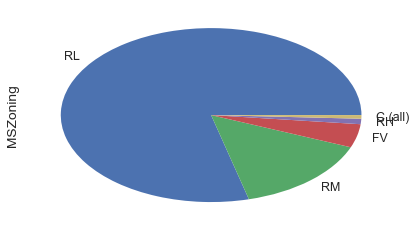

In [115]:
train_data.MSZoning.value_counts().plot(kind='pie')

In [116]:
def encode(x): return 1 if x == 'RL' else 0
train_data.MSZoning = train_data.MSZoning.apply(encode)
test_data.MSZoning = test_data.MSZoning.apply(encode)

In [117]:
train_data.MSZoning.unique()

array([1, 0])

In [118]:
train_data.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [119]:
def encode(x): return 1 if x == 'AllPub' else 0
train_data.Utilities = train_data.Utilities.apply(encode)
test_data.Utilities = test_data.Utilities.apply(encode)

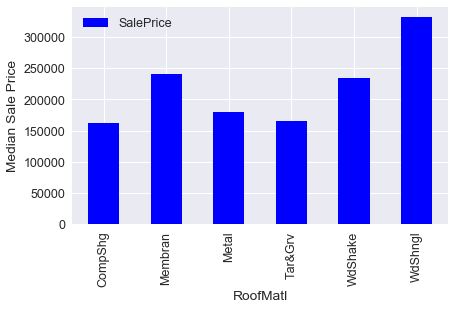

In [120]:
RoofMatl_pivot = train_data.pivot_table(index='RoofMatl',
                                    values='SalePrice', aggfunc=np.median)
RoofMatl_pivot.plot(kind='bar', color='blue')
plt.xlabel('RoofMatl')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.show()

In [121]:
train_data.RoofMatl.unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv'],
      dtype=object)

In [122]:
def encode(x): return 1 if x == 'WdShngl' else 0
train_data.RoofMatl = train_data.RoofMatl.apply(encode)
test_data.RoofMatl = test_data.RoofMatl.apply(encode)

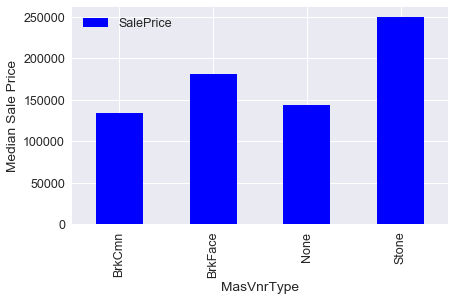

In [123]:
MasVnrType_pivot = train_data.pivot_table(index='MasVnrType',
                                    values='SalePrice', aggfunc=np.median)
MasVnrType_pivot.plot(kind='bar', color='blue')
plt.xlabel('MasVnrType')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.show()

In [124]:
def encode(x): return 1 if x == 'Stone' else 0
train_data.MasVnrType = train_data.MasVnrType.apply(encode)
test_data.MasVnrType = test_data.MasVnrType.apply(encode)

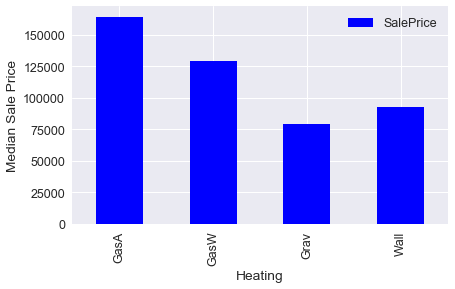

In [125]:
Heating_pivot = train_data.pivot_table(index='Heating',
                                    values='SalePrice', aggfunc=np.median)
Heating_pivot.plot(kind='bar', color='blue')
plt.xlabel('Heating')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.show()

In [126]:
def encode(x): return 1 if x == 'GasA' else 0
train_data.Heating = train_data.Heating.apply(encode)
test_data.Heating = test_data.Heating.apply(encode)

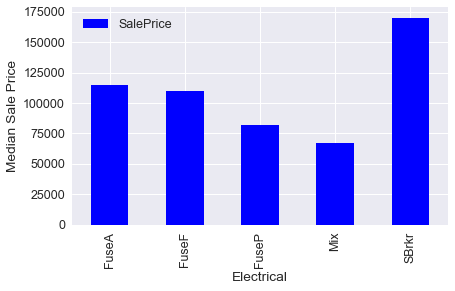

In [127]:
Electrical_pivot = train_data.pivot_table(index='Electrical',
                                    values='SalePrice', aggfunc=np.median)
Electrical_pivot.plot(kind='bar', color='blue')
plt.xlabel('Electrical')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.show()

In [128]:
def encode(x): return 1 if x == 'SBrkr' else 0
train_data.Electrical = train_data.Electrical.apply(encode)
test_data.Electrical = test_data.Electrical.apply(encode)

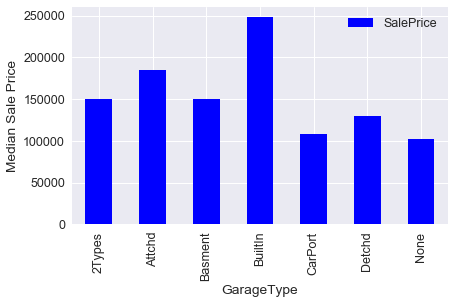

In [129]:
GarageType_pivot = train_data.pivot_table(index='GarageType',
                                    values='SalePrice', aggfunc=np.median)
GarageType_pivot.plot(kind='bar', color='blue')
plt.xlabel('GarageType')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.show()

In [130]:
train_data.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment',
       '2Types'], dtype=object)

In [131]:
def encode(x): return 1 if x == 'BuiltIn' else 0
train_data.GarageType = train_data.GarageType.apply(encode)
test_data.GarageType = test_data.GarageType.apply(encode)

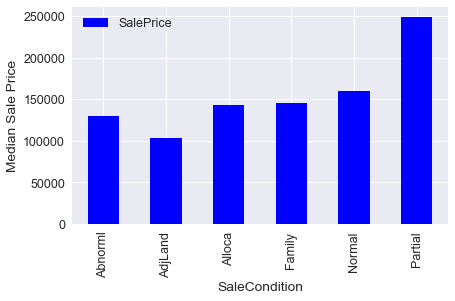

In [132]:
SaleCondition_pivot = train_data.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
SaleCondition_pivot.plot(kind='bar', color='blue')
plt.xlabel('SaleCondition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.show()

In [133]:
train_data.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [134]:
def encode(x): return 1 if x == 'Partial' else 0
train_data.SaleCondition = train_data.SaleCondition.apply(encode)
test_data.SaleCondition = test_data.SaleCondition.apply(encode)

In [135]:
categorical_train_data_df = train_data.select_dtypes(exclude=[np.number])
categorical_train_data_df.columns

Index(['LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'MiscFeature', 'SaleType'],
      dtype='object')

We will simply ignore those features

In [136]:
train_data.shape

(1193, 80)

In [137]:
data = train_data.select_dtypes(include=[np.number]).interpolate().dropna()

In [138]:
data.shape

(1193, 67)

In [139]:
sum(data.isnull().sum() != 0)

0

### Simplest approach: basic model

We'll separate the features and the target variable for modeling. We will assign the features to X and the target variable to y

In [140]:
X = data.iloc[:, data.columns != 'SalePrice'].values
y = np.log(data['SalePrice'])

In [141]:
validation_size = 0.20
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=1)

In [142]:
X_train.shape

(954, 66)

In [143]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_validation)

print('RMSE is:', mean_squared_error(y_validation, predictions))
print ("R^2 is: ", model.score(X_validation, y_validation))

RMSE is: 0.015468265354689547
R^2 is:  0.8785710455209994


Our features explain approximately 87% of the variance in our target variable

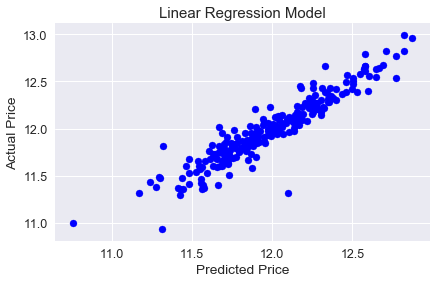

In [144]:
plt.scatter(predictions, y_validation, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

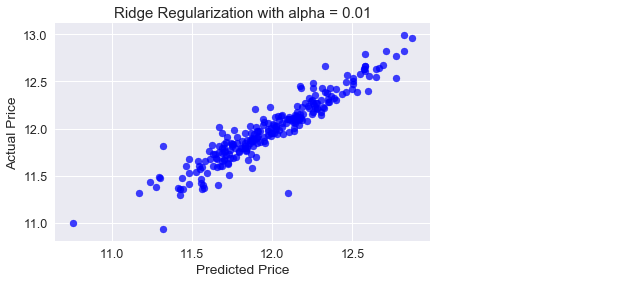

R^2 is: 0.8785702818485963 RMSE is: 0.01546836263533753


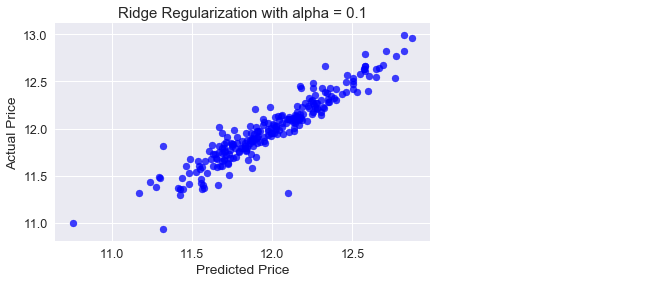

R^2 is: 0.8785637711915384 RMSE is: 0.015469191997423687


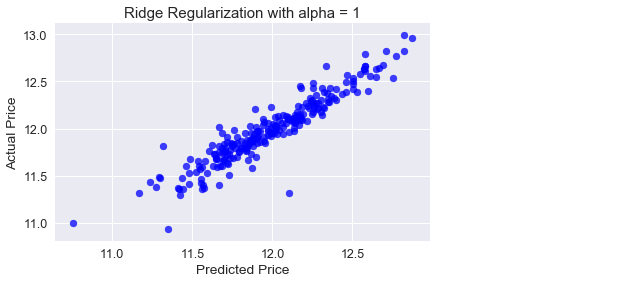

R^2 is: 0.8785626507028258 RMSE is: 0.01546933473122887


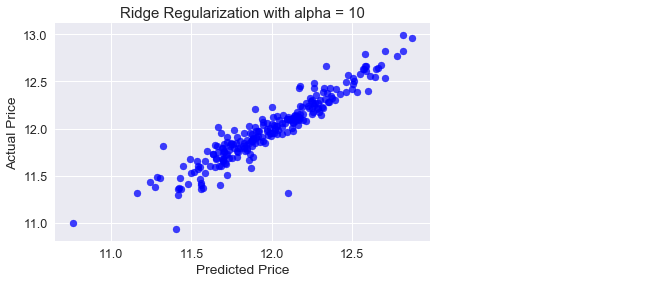

R^2 is: 0.8798461407450859 RMSE is: 0.015305836950662753


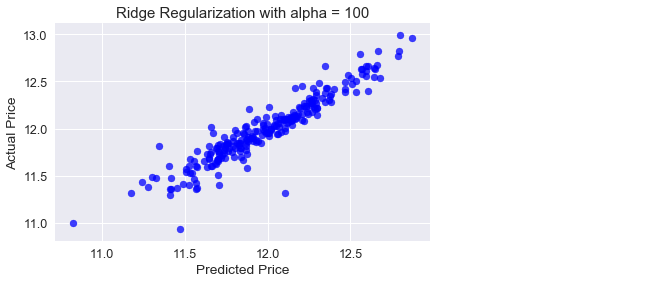

R^2 is: 0.8820603981844747 RMSE is: 0.015023773074027925


In [145]:
actual_values = y_validation
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_validation)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {} RMSE is: {}'.format(
                    ridge_model.score(X_validation, y_validation),
                    mean_squared_error(y_validation, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()
    print(overlay)

# 3. Defining a modeling approach to the problem

In [146]:
num_folds = 10
scoring = 'neg_mean_squared_error'
# Spot-check algorithms
models = [('LR', LinearRegression()), ('LASSO', Lasso()), ('EN', ElasticNet()), ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()), ('SVR', SVR()), ('RF', RandomForestRegressor()), ('XGB', xgb.XGBRegressor())]
results = []
names = []
seed = np.random.seed(1990)
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.016259 (0.005879)
LASSO: -0.029249 (0.008572)
EN: -0.026915 (0.008130)
KNN: -0.056106 (0.012931)
CART: -0.040160 (0.009676)
SVR: -0.171131 (0.024041)
RF: -0.023065 (0.005135)
XGB: -0.016654 (0.004107)


## Feature selection/elimination

In [147]:
# Keep only the best features according to p-values of ANOVA test
k_best = SelectKBest(f_classif, k=60)
X_best = k_best.fit_transform(X,y)

In [148]:
X_best.shape

(1193, 60)

In [149]:
y.shape

(1193,)

In [150]:
validation_size = 0.20
X_train, X_validation, y_train, y_validation = train_test_split(X_best, y, test_size=validation_size, random_state=1)

In [151]:
X_train.shape

(954, 60)

In [152]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_validation)

print('RMSE is:', mean_squared_error(y_validation, predictions))
print ("R^2 is: ", model.score(X_validation, y_validation))

RMSE is: 0.015116145516923134
R^2 is:  0.8813352561658814


In [153]:
num_folds = 10
scoring = 'neg_mean_squared_error'
# Spot-check algorithms
models = [('LR', LinearRegression()), ('LASSO', Lasso()), ('EN', ElasticNet()), ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()), ('SVR', SVR()), ('RF', RandomForestRegressor()), ('XGB', xgb.XGBRegressor())]
results = []
names = []
seed = np.random.seed(1990)
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.015253 (0.004187)
LASSO: -0.029249 (0.008572)
EN: -0.026915 (0.008130)
KNN: -0.055915 (0.012847)
CART: -0.040438 (0.007883)
SVR: -0.171142 (0.024045)
RF: -0.022879 (0.005129)
XGB: -0.016526 (0.004342)


- p value
- correlation
- feature selection par xgboost
- svd, pca, 

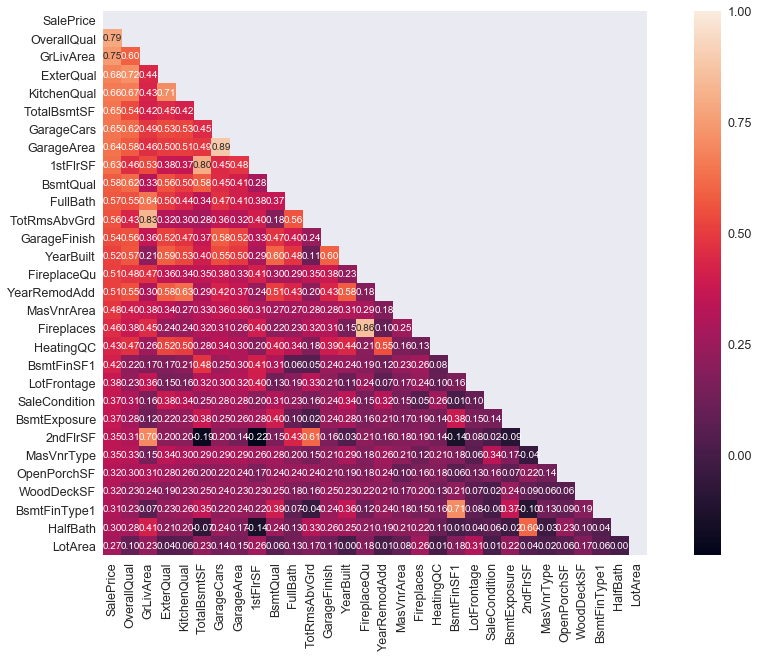

In [154]:
corr_matrix = train_data.corr()
plt.figure(figsize=(15,10))
k = 30
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.25)
sns.heatmap(cm, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, \
           yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [155]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', 'GarageArea', '1stFlrSF', 'BsmtQual',
       'FullBath', 'TotRmsAbvGrd', 'GarageFinish', 'YearBuilt', 'FireplaceQu',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'HeatingQC', 'BsmtFinSF1',
       'LotFrontage', 'SaleCondition', 'BsmtExposure', '2ndFlrSF',
       'MasVnrType', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinType1', 'HalfBath',
       'LotArea'],
      dtype='object')

In [156]:
test_data.index

Int64Index([1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210,
            ...
            1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
           dtype='int64', name='Id', length=260)

In [157]:
print('Shape of train dataset: {}'.format(train_data.shape))
top_features = ['GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X = train_data[top_features]
y = train_data['SalePrice']

from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X, y)

print('Shape of test dataset: {}'.format(test_data.shape))
#test_data.fillna(test_data.mean(), inplace=True)
quick_test = test_data[top_features]

predictions = forest_model.predict(quick_test)
print(predictions)

my_submission = pd.DataFrame({'Id':test_data.index,'SalePrice':predictions})
my_submission.to_csv('submission_aml17.csv',index=False)

Shape of train dataset: (1193, 80)
Shape of test dataset: (260, 79)
[124700.         215190.         114947.9        237350.
 138350.         440605.9        137830.         252750.
 151845.         238131.7        222319.         216227.5
  90700.         101869.3        134100.         110518.3
 154725.3        223883.          76200.          83805.
 113625.         141475.         178500.         298700.
 176468.         128775.         264058.         131310.
 288375.2        140485.8        218190.         147345.
  99200.         147933.7        113100.         149200.
 165640.         220550.         160020.         208789.
 214302.5        297815.         150153.7        396497.9
 150000.         201250.         187236.66666667 179210.
 193740.         127515.         305150.         212219.
 122320.         206940.         182990.         113670.
 257606.1        103970.         167370.         145395.
 188300.         136570.         193900.         176440.
 191916.         